# Tarea #1 Inteligencia Artificial: Implementación de Regresión Lineal Manual con Descenso de Gradiente.
## Profesor:
- Steven Andrey Pacheco Portuguez

## Estudiantes:
- Javier Alonso Rojas Rojas
- Dario Espinoza
- Emmanuel Sanchez


## Lectura del dataset

In [11]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('Student_Performance.csv')
# Ver las filas y columnas del DataFrame
print(df.shape)

# Ver las columnas y tipos de datos del DataFrame
print(df.info())

# Ver características estadísticas descriptivas básicas del DataFrame
print(df.describe())
print(df.describe(include='all'))

# Valores duplicados
print(f"Duplicados: {df.duplicated().sum() | 0}")
# Valores nulos
print(f"Nulos:\n {df.isna().sum() | 0}")
df

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Tratamiento de duplicados

In [12]:
df = df.drop_duplicates()

# Confirmar que se borraron
print(f"Duplicados: {df.duplicated().sum()}")  
print(f"Forma: {df.shape}")               


Duplicados: 0
Forma: (9873, 6)


## Histogramas

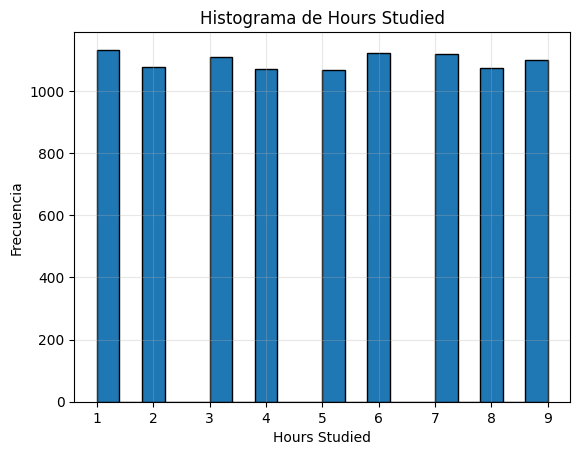

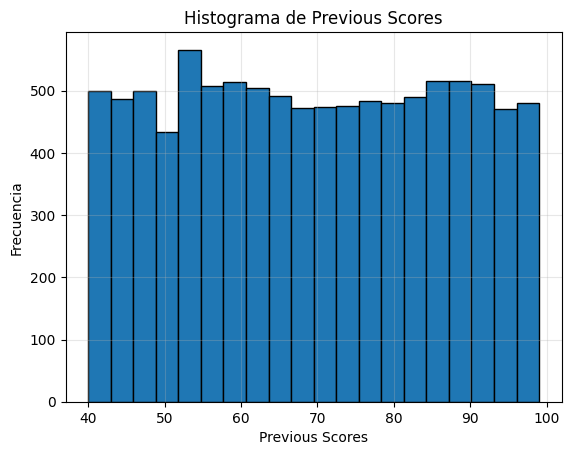

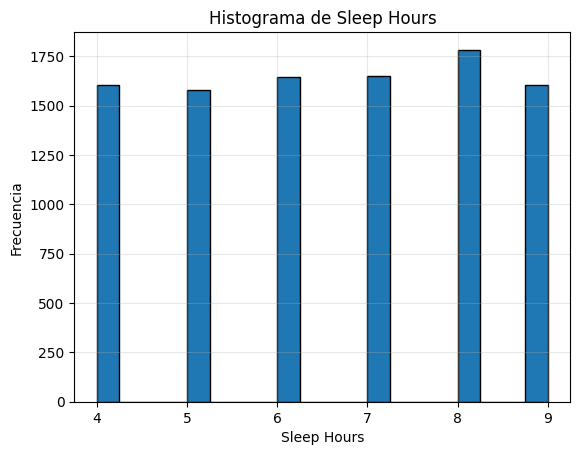

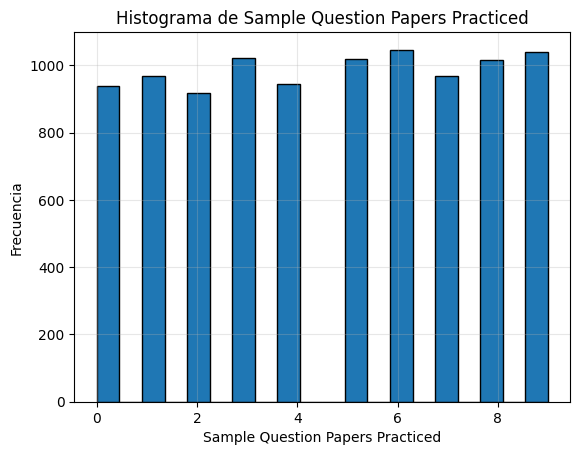

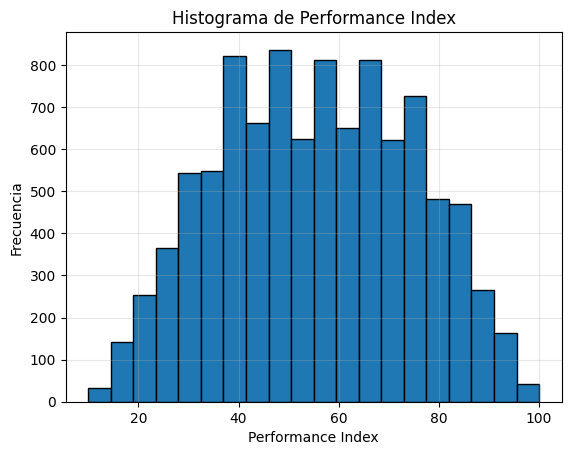

In [13]:
num_vars = ["Hours Studied", "Previous Scores", "Sleep Hours",
            "Sample Question Papers Practiced", "Performance Index"]
for col in num_vars:
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()


## Boxplots

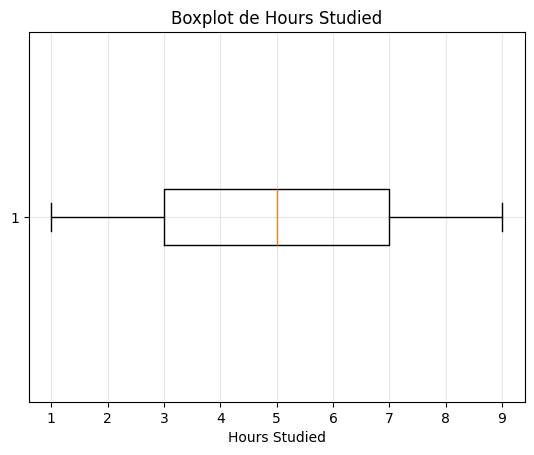

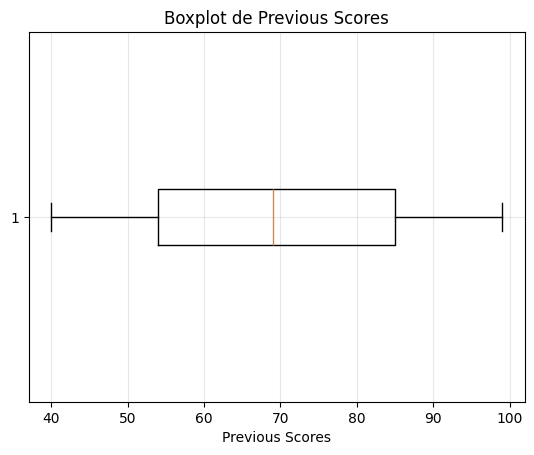

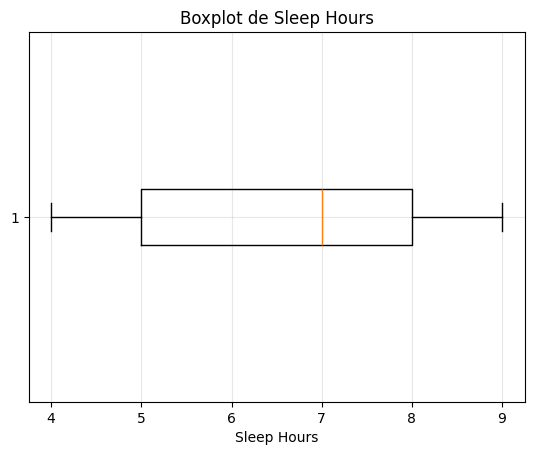

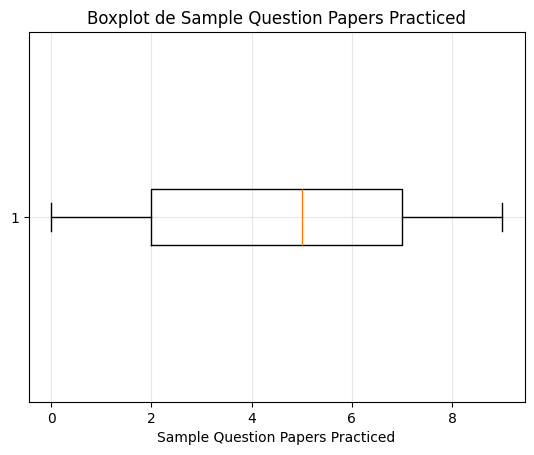

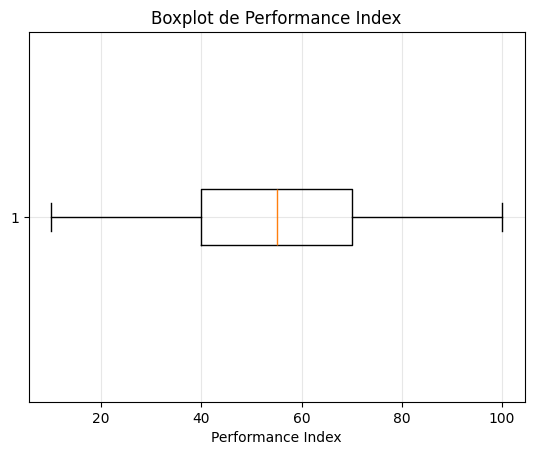

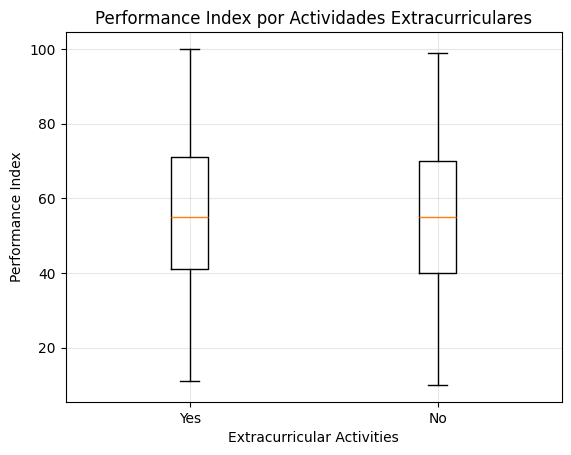

In [21]:
# 2. Boxplots
for col in num_vars:
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.grid(alpha=0.3)
    plt.show()


# Boxplot del Performance Index por categoría de actividades extracurriculares
categories = df["Extracurricular Activities"].unique()
data = [df[df["Extracurricular Activities"] == cat]["Performance Index"] for cat in categories]

plt.boxplot(data, tick_labels=categories)
plt.title("Performance Index por Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.grid(alpha=0.3)
plt.show()


## Scatter Plots contra el Performance Index

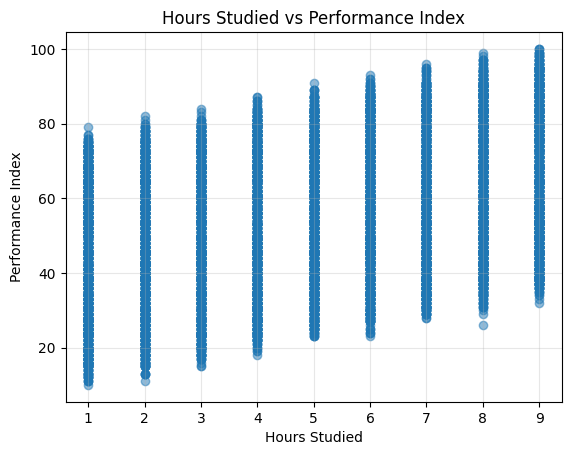

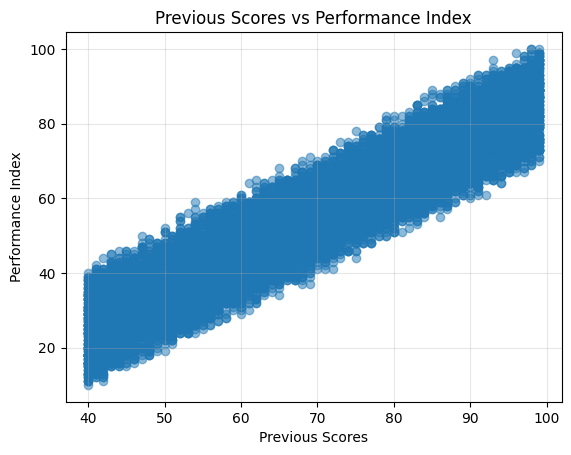

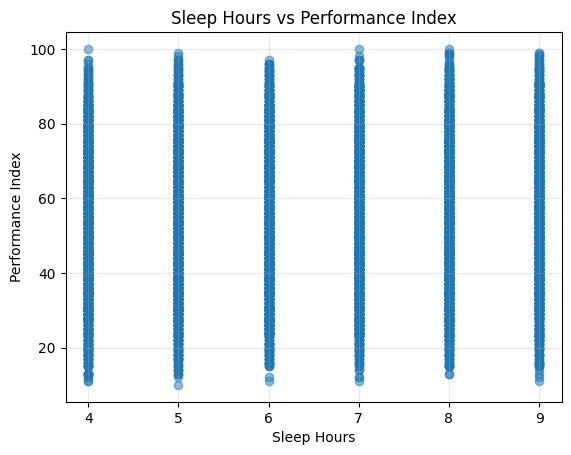

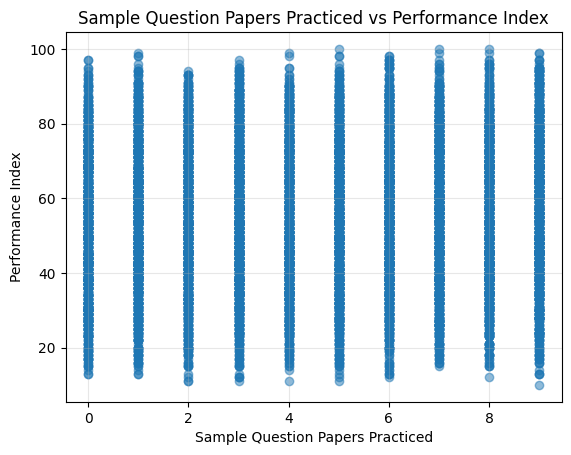

In [15]:
target = "Performance Index"
for col in num_vars:
    if col != target:
        plt.scatter(df[col], df[target], alpha=0.5)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(alpha=0.3)
        plt.show()

## Heatmap de correlacion

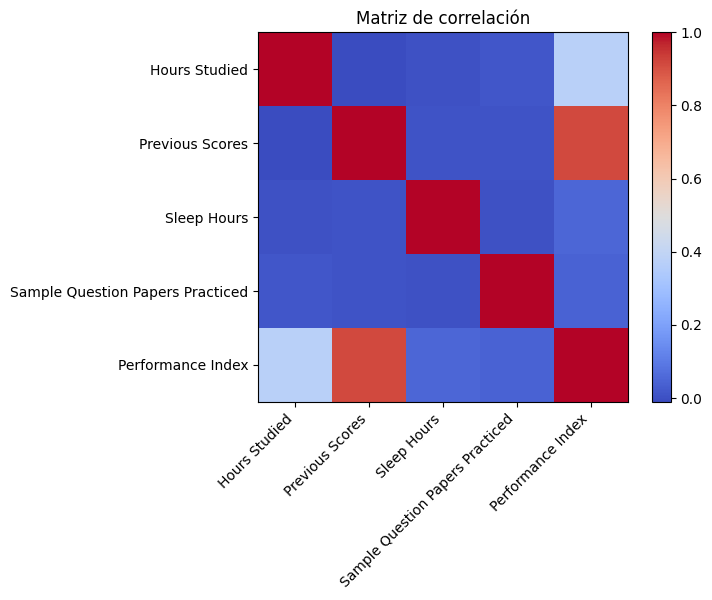

In [16]:
corr = df[num_vars].corr()

fig, ax = plt.subplots()
cax = ax.imshow(corr, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

# Poner etiquetas en ejes
ax.set_xticks(range(len(corr)))
ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)

plt.title("Matriz de correlación")
plt.show()

## Grafico de barras para variable categorica

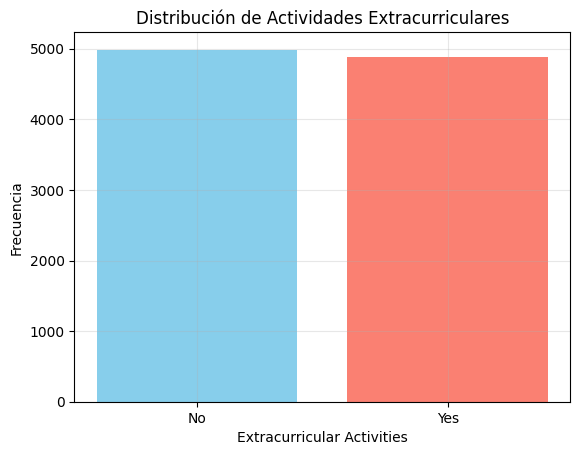

In [17]:
cat_counts = df["Extracurricular Activities"].value_counts()

plt.bar(cat_counts.index, cat_counts.values, color=['skyblue', 'salmon'])
plt.title("Distribución de Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

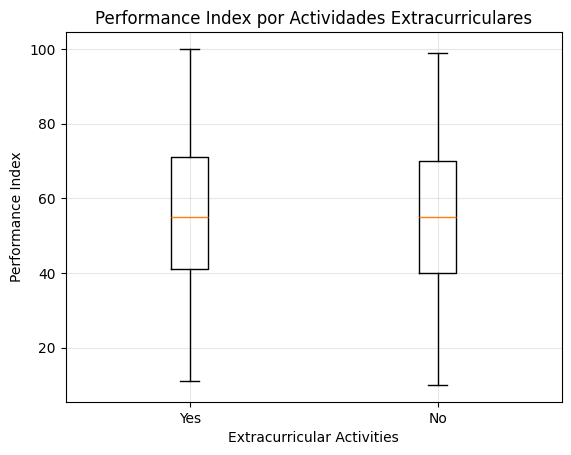

In [19]:
categories = df["Extracurricular Activities"].unique()
data = [df[df["Extracurricular Activities"] == cat][target] for cat in categories]

plt.boxplot(data, tick_labels=categories)
plt.title(f"{target} por Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel(target)
plt.grid(alpha=0.3)
plt.show()